#### Import libraries


In [1]:
#importing the necessary libraries


import numpy as np
import pandas as pd
import lasio

import matplotlib.pyplot as plt
import seaborn as sns

import cufflinks as cf
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objs as go
import plotly as py
cf.go_offline()

from scipy import stats
from scipy.stats import skew
import scipy.signal as signal
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import warnings

# Suppress the UndefinedMetricWarning
warnings.filterwarnings("ignore")


# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

#### Read the las file

In [2]:
las = lasio.read('15_913.las')
las1 = lasio.read('16_8-1.las')
las2 = lasio.read('25_11-5.las')
las3 = lasio.read('25_6-3.las')
las4 = lasio.read('31_2-21 S.las')

#### convert las to df

In [3]:
df = las.df()
df1 = las1.df()
df2 = las2.df()
df3 = las3.df()
df4 = las4.df()

In [4]:
#df.to_csv('well_log.csv')
#df1.to_csv('well_log1.csv')
#df2.to_csv('well_log2.csv')
#df3.to_csv('well_log3.csv')
#df4.to_csv('well_log4.csv')

In [5]:
df = pd.read_csv('well_log.csv')
df1 = pd.read_csv('well_log1.csv')
df2 = pd.read_csv('well_log2.csv')
df3 = pd.read_csv('well_log3.csv')
df4 = pd.read_csv('well_log4.csv')

In [6]:
df.columns

Index(['DEPT', 'FORCE_2020_LITHOFACIES_CONFIDENCE',
       'FORCE_2020_LITHOFACIES_LITHOLOGY', 'CALI', 'MUDWEIGHT', 'ROP', 'RDEP',
       'RSHA', 'RMED', 'RXO', 'SP', 'DTC', 'NPHI', 'PEF', 'GR', 'RHOB', 'DRHO',
       'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC'],
      dtype='object')

In [7]:
df.shape

(21441, 21)

In [8]:
df1.shape

(14586, 19)

In [9]:
df2.shape

(13337, 20)

In [10]:
df3.shape

(15388, 21)

In [11]:
df4.shape

(18731, 20)

In [12]:
df_df = pd.concat([df, df1, df2, df3, df4], ignore_index=True)

In [13]:
df_df.head()

,DEPT,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,MUDWEIGHT,ROP,RDEP,RSHA,RMED,RXO,...,DRHO,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,BS,DCAL,RMIC,DTS,ROPA
0,25.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25.152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25.304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25.456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25.608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_df)
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df_df)

fs = 1000  # sample rate
nyquist = fs/2
cutoff_freq = 50  # cutoff frequency
b, a = signal.butter(2, cutoff_freq/nyquist, 'lowpass')
filtered_data = signal.filtfilt(b, a, df_df)

df_df = df_df.interpolate(method='linear', limit_direction='both')

def remove_outliers(df_df):
    # Calculate skewness
    data_skewness = skew(df_df)

    # Calculate z-scores
    z_scores = (df_df - np.mean(df_df)) / np.std(df_df)

    # Define threshold for outliers
    threshold = 3

    # Remove outliers
    df_df = df_df[abs(z_scores) <= threshold]

    return df_df

In [15]:
df_df.head()

,DEPT,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,MUDWEIGHT,ROP,RDEP,RSHA,RMED,RXO,...,DRHO,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,BS,DCAL,RMIC,DTS,ROPA
0,25.000,1.0,65000.0,19.5,0.129413,239.321213,8.0156,0.297633,0.410763,0.271762,...,-0.58839,98.720001,437642.15625,6470975.5,-73.719467,36.0,-4.349895,0.174149,274.982605,271.724701
1,25.152,1.0,65000.0,19.5,0.129413,239.321213,8.0156,0.297633,0.410763,0.271762,...,-0.58839,98.720001,437642.15625,6470975.5,-73.719467,36.0,-4.349895,0.174149,274.982605,271.724701
2,25.304,1.0,65000.0,19.5,0.129413,239.321213,8.0156,0.297633,0.410763,0.271762,...,-0.58839,98.720001,437642.15625,6470975.5,-73.719467,36.0,-4.349895,0.174149,274.982605,271.724701
3,25.456,1.0,65000.0,19.5,0.129413,239.321213,8.0156,0.297633,0.410763,0.271762,...,-0.58839,98.720001,437642.15625,6470975.5,-73.719467,36.0,-4.349895,0.174149,274.982605,271.724701
4,25.608,1.0,65000.0,19.5,0.129413,239.321213,8.0156,0.297633,0.410763,0.271762,...,-0.58839,98.720001,437642.15625,6470975.5,-73.719467,36.0,-4.349895,0.174149,274.982605,271.724701


In [16]:
df_df.columns

Index(['DEPT', 'FORCE_2020_LITHOFACIES_CONFIDENCE',
       'FORCE_2020_LITHOFACIES_LITHOLOGY', 'CALI', 'MUDWEIGHT', 'ROP', 'RDEP',
       'RSHA', 'RMED', 'RXO', 'SP', 'DTC', 'NPHI', 'PEF', 'GR', 'RHOB', 'DRHO',
       'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'BS', 'DCAL', 'RMIC', 'DTS',
       'ROPA'],
      dtype='object')

In [17]:
df_df.corr()

,DEPT,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,MUDWEIGHT,ROP,RDEP,RSHA,RMED,RXO,...,DRHO,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,BS,DCAL,RMIC,DTS,ROPA
DEPT,1.000000,-0.336913,-0.003347,-0.257121,-0.297384,-0.300314,0.052579,0.300382,0.114819,0.018368,...,0.304910,0.890204,0.108469,0.151276,-0.885314,-0.099922,0.115084,0.215306,-0.353038,-0.244845
FORCE_2020_LITHOFACIES_CONFIDENCE,-0.336913,1.000000,0.392472,-0.234395,0.184356,0.030270,0.028766,0.124298,0.040401,0.294958,...,0.204952,-0.202047,0.162374,0.146449,0.198060,-0.090224,-0.007365,0.171207,0.292824,-0.175948
FORCE_2020_LITHOFACIES_LITHOLOGY,-0.003347,0.392472,1.000000,-0.188772,-0.082521,-0.265962,0.024656,0.207350,0.040793,0.072990,...,0.059077,-0.009243,0.153278,0.116520,0.005746,0.061593,0.124730,0.197564,0.251329,-0.193947
CALI,-0.257121,-0.234395,-0.188772,1.000000,-0.127480,0.183109,-0.070193,-0.297693,-0.126382,-0.685432,...,-0.518404,-0.349588,-0.523709,-0.441776,0.342871,0.464267,-0.426721,-0.300982,0.037999,0.311440
MUDWEIGHT,-0.297384,0.184356,-0.082521,-0.127480,1.000000,0.217718,-0.076184,-0.339473,-0.085707,0.436590,...,0.033468,-0.233427,-0.199740,-0.352858,0.222966,0.119950,-0.455009,-0.392765,-0.027148,0.416296
ROP,-0.300314,0.030270,-0.265962,0.183109,0.217718,1.000000,-0.034428,-0.156608,-0.078708,0.052489,...,-0.194283,-0.323202,-0.095080,-0.011603,0.323746,-0.235919,-0.158435,-0.134094,0.045130,0.142250
RDEP,0.052579,0.028766,0.024656,-0.070193,-0.076184,-0.034428,1.000000,0.119470,0.464509,-0.007811,...,-0.028449,0.097220,0.027267,0.042753,-0.092379,-0.001961,0.035348,0.081688,-0.129874,-0.080888
RSHA,0.300382,0.124298,0.207350,-0.297693,-0.339473,-0.156608,0.119470,1.000000,0.167436,0.151556,...,0.243386,0.264377,0.543779,0.594085,-0.244291,-0.332230,0.440458,0.833071,-0.103498,-0.694236
RMED,0.114819,0.040401,0.040793,-0.126382,-0.085707,-0.078708,0.464509,0.167436,1.000000,0.023982,...,0.053297,0.170086,0.054372,0.073170,-0.165594,-0.033466,0.061467,0.111612,-0.151099,-0.106552
RXO,0.018368,0.294958,0.072990,-0.685432,0.436590,0.052489,-0.007811,0.151556,0.023982,1.000000,...,0.446933,0.071389,0.647122,0.513554,-0.062349,-0.597842,0.445759,0.269685,0.015672,-0.285819


#### Cleaning and Preprocessing

In [18]:
df.isna().sum()

DEPT                                     0
FORCE_2020_LITHOFACIES_CONFIDENCE     3164
FORCE_2020_LITHOFACIES_LITHOLOGY      3171
CALI                                  3096
MUDWEIGHT                             3921
ROP                                   1144
RDEP                                   485
RSHA                                 19818
RMED                                   484
RXO                                  19814
SP                                     485
DTC                                    159
NPHI                                  7336
PEF                                   4995
GR                                     541
RHOB                                  3096
DRHO                                  3096
DEPTH_MD                               485
X_LOC                                  485
Y_LOC                                  485
Z_LOC                                  485
dtype: int64

In [19]:
data = df.copy()

In [20]:
data1 = df1.copy()

In [21]:
data2 = df2.copy()

In [22]:
data3 = df3.copy()

In [23]:
data4 = df4.copy()

##### normalize the data, apply a Butterworth filter to remove high-frequency noise, then interpolate to remove noise

In [24]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)


fs = 1000  # sample rate
nyquist = fs/2
cutoff_freq = 50  # cutoff frequency
b, a = signal.butter(2, cutoff_freq/nyquist, 'lowpass')
filtered_data = signal.filtfilt(b, a, data)


data = data.interpolate(method='linear', limit_direction='both')

##### Further Cleaning, remove outliers

In [25]:
def remove_outliers(data):
    # Calculate skewness
    data_skewness = skew(data)

    # Calculate z-scores
    z_scores = (data - np.mean(data)) / np.std(data)

    # Define threshold for outliers
    threshold = 3

    # Remove outliers
    data = data[abs(z_scores) <= threshold]

    return data

In [26]:
#normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data1)
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data1)

# apply a Butterworth filter to remove high-frequency noise
fs = 1000  # sample rate
nyquist = fs/2
cutoff_freq = 50  # cutoff frequency
b, a = signal.butter(2, cutoff_freq/nyquist, 'lowpass')
filtered_data = signal.filtfilt(b, a, data1)

#interpolate
data1 = data1.interpolate(method='linear', limit_direction='both')



def remove_outliers(data1):
    # Calculate skewness
    data_skewness = skew(data1)

    # Calculate z-scores
    z_scores = (data1 - np.mean(data1)) / np.std(data1)

    # Define threshold for outliers
    threshold = 3

    # Remove outliers
    data1 = data1[abs(z_scores) <= threshold]

    return data1

In [27]:
#normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data2)
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data2)

# apply a Butterworth filter to remove high-frequency noise
fs = 1000  # sample rate
nyquist = fs/2
cutoff_freq = 50  # cutoff frequency
b, a = signal.butter(2, cutoff_freq/nyquist, 'lowpass')
filtered_data = signal.filtfilt(b, a, data2)

#interpolate
data2 = data2.interpolate(method='linear', limit_direction='both')



def remove_outliers(data2):
    # Calculate skewness
    data_skewness = skew(data2)

    # Calculate z-scores
    z_scores = (data2 - np.mean(data2)) / np.std(data2)

    # Define threshold for outliers
    threshold = 3

    # Remove outliers
    data2 = data2[abs(z_scores) <= threshold]

    return data2

In [28]:
#normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data3)
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data3)

# apply a Butterworth filter to remove high-frequency noise
fs = 1000  # sample rate
nyquist = fs/2
cutoff_freq = 50  # cutoff frequency
b, a = signal.butter(2, cutoff_freq/nyquist, 'lowpass')
filtered_data = signal.filtfilt(b, a, data3)

#interpolate
data3 = data3.interpolate(method='linear', limit_direction='both')



def remove_outliers(data3):
    # Calculate skewness
    data_skewness = skew(data3)

    # Calculate z-scores
    z_scores = (data3 - np.mean(data3)) / np.std(data3)

    # Define threshold for outliers
    threshold = 3

    # Remove outliers
    data3 = data3[abs(z_scores) <= threshold]

    return data3

In [29]:
#normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data4)
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data4)

# apply a Butterworth filter to remove high-frequency noise
fs = 1000  # sample rate
nyquist = fs/2
cutoff_freq = 50  # cutoff frequency
b, a = signal.butter(2, cutoff_freq/nyquist, 'lowpass')
filtered_data = signal.filtfilt(b, a, data4)

#interpolate
data4 = data4.interpolate(method='linear', limit_direction='both')



def remove_outliers(data4):
    # Calculate skewness
    data_skewness = skew(data4)

    # Calculate z-scores
    z_scores = (data4 - np.mean(data4)) / np.std(data4)

    # Define threshold for outliers
    threshold = 3

    # Remove outliers
    data4 = data4[abs(z_scores) <= threshold]

    return data4

In [30]:
data.isna().sum()

DEPT                                 0
FORCE_2020_LITHOFACIES_CONFIDENCE    0
FORCE_2020_LITHOFACIES_LITHOLOGY     0
CALI                                 0
MUDWEIGHT                            0
ROP                                  0
RDEP                                 0
RSHA                                 0
RMED                                 0
RXO                                  0
SP                                   0
DTC                                  0
NPHI                                 0
PEF                                  0
GR                                   0
RHOB                                 0
DRHO                                 0
DEPTH_MD                             0
X_LOC                                0
Y_LOC                                0
Z_LOC                                0
dtype: int64

In [31]:
data.columns

Index(['DEPT', 'FORCE_2020_LITHOFACIES_CONFIDENCE',
       'FORCE_2020_LITHOFACIES_LITHOLOGY', 'CALI', 'MUDWEIGHT', 'ROP', 'RDEP',
       'RSHA', 'RMED', 'RXO', 'SP', 'DTC', 'NPHI', 'PEF', 'GR', 'RHOB', 'DRHO',
       'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC'],
      dtype='object')

##### Rename columns, Select necessary columns

In [32]:
data =  data.rename(columns= {'DEPT':'DEPTH'})
data1 = data1.rename(columns={'DEPT':'DEPTH'})
data2 = data2.rename(columns={'DEPT':'DEPTH'})
data3 = data3.rename(columns={'DEPT':'DEPTH'})
data4 = data4.rename(columns={'DEPT':'DEPTH'})

In [33]:
data = data.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY':'LITHOLOGY'})
data1 = data1.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY':'LITHOLOGY'})
data2 = data2.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY':'LITHOLOGY'})
data3 = data3.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY':'LITHOLOGY'})
data4 = data4.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY':'LITHOLOGY'})

In [34]:
data = data[['DEPTH', 'LITHOLOGY', 'ROP', 'RDEP',  'RMED', 'SP', 'DTC', 'NPHI', 'GR', 'RHOB', 'DRHO']]

In [35]:
data1 = data1[['DEPTH', 'LITHOLOGY', 'ROP', 'RDEP',  'RMED', 'SP', 'DTC', 'NPHI', 'GR', 'RHOB', 'DRHO']]

In [36]:
data2 = data2[['DEPTH', 'LITHOLOGY', 'ROP', 'RDEP',  'RMED', 'SP', 'DTC', 'NPHI', 'GR', 'RHOB', 'DRHO']]

In [37]:
data3 = data3[['DEPTH', 'LITHOLOGY', 'ROP', 'RDEP', 'RSHA', 'RMED', 'SP', 'DTC', 'NPHI', 'GR', 'RHOB']]

In [38]:
data4 = data4[['DEPTH', 'LITHOLOGY', 'ROP', 'RDEP', 'RMED',  'DTC', 'NPHI','PEF', 'GR', 'RHOB', 'DRHO']]

###### Check for correlation between columns

In [39]:
data.corr()

,DEPTH,LITHOLOGY,ROP,RDEP,RMED,SP,DTC,NPHI,GR,RHOB,DRHO
DEPTH,1.000000,0.096758,-0.544034,0.059856,0.304156,0.882449,-0.876118,-0.882626,0.198132,0.726235,0.641382
LITHOLOGY,0.096758,1.000000,-0.039446,0.085721,0.121440,0.097073,-0.158347,-0.212552,0.259471,0.461301,-0.117005
ROP,-0.544034,-0.039446,1.000000,0.204915,-0.208016,-0.770628,0.565295,0.451266,-0.281511,-0.350598,-0.520410
RDEP,0.059856,0.085721,0.204915,1.000000,0.538058,-0.117576,-0.182146,-0.216272,-0.289255,0.279827,-0.179140
RMED,0.304156,0.121440,-0.208016,0.538058,1.000000,0.284115,-0.447419,-0.423509,-0.145170,0.434119,0.096756
SP,0.882449,0.097073,-0.770628,-0.117576,0.284115,1.000000,-0.810713,-0.735938,0.384027,0.623078,0.694886
DTC,-0.876118,-0.158347,0.565295,-0.182146,-0.447419,-0.810713,1.000000,0.871989,-0.044305,-0.801309,-0.536001
NPHI,-0.882626,-0.212552,0.451266,-0.216272,-0.423509,-0.735938,0.871989,1.000000,-0.002573,-0.781108,-0.485931
GR,0.198132,0.259471,-0.281511,-0.289255,-0.145170,0.384027,-0.044305,-0.002573,1.000000,0.172933,0.179086
RHOB,0.726235,0.461301,-0.350598,0.279827,0.434119,0.623078,-0.801309,-0.781108,0.172933,1.000000,0.278435


In [40]:
# Compute the correlation matrix
correlation_matrix = data.corr()

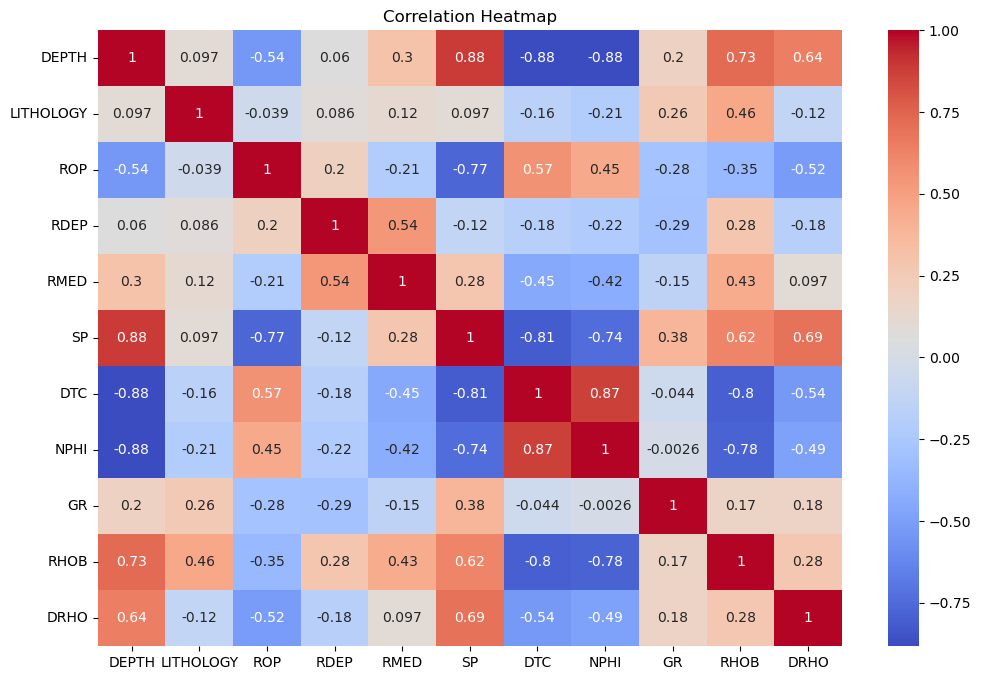

In [41]:
# Set up the figure and axes
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)

# Set the title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

In [42]:
data.describe()

,DEPTH,LITHOLOGY,ROP,RDEP,RMED,SP,DTC,NPHI,GR,RHOB,DRHO
count,21441.00000,21441.000000,21441.000000,21441.000000,21441.000000,21441.000000,21441.000000,21441.000000,21441.000000,21441.000000,21441.000000
mean,1654.44000,61175.142950,38.380071,2.072140,1.746634,56.657894,131.846717,0.527238,61.896289,2.084467,-0.073601
std,940.82344,13020.368038,53.666310,2.873756,2.715902,52.356634,33.811269,0.203479,29.353062,0.288058,0.215760
min,25.00000,30000.000000,0.138586,0.352202,0.116862,-149.232254,55.726753,0.024330,6.191506,1.404576,-0.679026
25%,839.72000,65000.000000,5.589831,0.837473,0.764600,30.532537,94.523232,0.373109,38.796658,1.909681,-0.012520
50%,1654.44000,65000.000000,32.002563,1.414814,1.206461,57.849400,144.089554,0.508554,66.185989,2.027300,-0.001593
75%,2469.16000,65000.000000,42.096554,2.120317,1.935782,79.185143,153.721191,0.765867,81.638596,2.272470,0.013670
max,3283.88000,99000.000000,1083.425415,168.014252,142.606338,153.096802,206.225693,0.800262,499.022583,2.938594,0.210927


In [43]:
data2.corr()

,DEPTH,LITHOLOGY,ROP,RDEP,RMED,SP,DTC,NPHI,GR,RHOB,DRHO
DEPTH,1.000000,-0.285868,-0.325664,0.003412,0.096464,0.687434,-0.690359,-0.726540,0.261398,-0.606845,0.184093
LITHOLOGY,-0.285868,1.000000,0.105895,-0.254430,-0.148644,0.076548,0.356005,0.409295,0.211856,0.288785,0.010422
ROP,-0.325664,0.105895,1.000000,-0.098847,-0.192003,-0.135651,0.336838,0.235703,-0.280480,0.046854,-0.077052
RDEP,0.003412,-0.254430,-0.098847,1.000000,0.881412,-0.014008,-0.179145,-0.180683,0.023668,0.056293,0.035997
RMED,0.096464,-0.148644,-0.192003,0.881412,1.000000,0.041726,-0.352435,-0.302941,0.129268,0.124443,0.096527
SP,0.687434,0.076548,-0.135651,-0.014008,0.041726,1.000000,-0.178877,-0.190534,0.274671,-0.492431,0.047957
DTC,-0.690359,0.356005,0.336838,-0.179145,-0.352435,-0.178877,1.000000,0.841532,-0.246510,0.183471,-0.297228
NPHI,-0.726540,0.409295,0.235703,-0.180683,-0.302941,-0.190534,0.841532,1.000000,-0.131741,0.404636,-0.281968
GR,0.261398,0.211856,-0.280480,0.023668,0.129268,0.274671,-0.246510,-0.131741,1.000000,0.050472,0.206558
RHOB,-0.606845,0.288785,0.046854,0.056293,0.124443,-0.492431,0.183471,0.404636,0.050472,1.000000,0.073875


In [44]:
data3.isna().sum()

DEPTH        0
LITHOLOGY    0
ROP          0
RDEP         0
RSHA         0
RMED         0
SP           0
DTC          0
NPHI         0
GR           0
RHOB         0
dtype: int64

In [45]:
data3.corr()

,DEPTH,LITHOLOGY,ROP,RDEP,RSHA,RMED,SP,DTC,NPHI,GR,RHOB
DEPTH,1.000000,0.074895,-0.550345,0.056707,0.190178,0.120089,NaN,-0.459280,-0.807594,0.564740,0.539154
LITHOLOGY,0.074895,1.000000,-0.194220,0.275431,0.113219,0.269052,NaN,-0.053568,-0.023557,0.504475,0.198329
ROP,-0.550345,-0.194220,1.000000,-0.083491,-0.158970,-0.116153,NaN,0.287453,0.498110,-0.444939,-0.264996
RDEP,0.056707,0.275431,-0.083491,1.000000,0.325488,0.992965,NaN,-0.465579,-0.205869,-0.050383,0.355178
RSHA,0.190178,0.113219,-0.158970,0.325488,1.000000,0.332456,NaN,-0.226250,-0.253424,0.088129,0.250132
RMED,0.120089,0.269052,-0.116153,0.992965,0.332456,1.000000,NaN,-0.473287,-0.254116,-0.017183,0.384637
SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DTC,-0.459280,-0.053568,0.287453,-0.465579,-0.226250,-0.473287,NaN,1.000000,0.722159,-0.113353,-0.631927
NPHI,-0.807594,-0.023557,0.498110,-0.205869,-0.253424,-0.254116,NaN,0.722159,1.000000,-0.420864,-0.600343
GR,0.564740,0.504475,-0.444939,-0.050383,0.088129,-0.017183,NaN,-0.113353,-0.420864,1.000000,0.139062


In [46]:
data4.corr()

,DEPTH,LITHOLOGY,ROP,RDEP,RMED,DTC,NPHI,PEF,GR,RHOB,DRHO
DEPTH,1.000000,-0.494614,-0.299340,0.095414,0.110358,-0.854864,0.703264,-0.807319,0.057655,-0.373464,-0.739680
LITHOLOGY,-0.494614,1.000000,0.144106,-0.064305,-0.068655,0.389541,-0.222432,0.616215,0.261896,0.358141,0.562390
ROP,-0.299340,0.144106,1.000000,-0.062212,-0.066110,0.317458,-0.338863,0.296840,-0.079065,0.165970,0.281078
RDEP,0.095414,-0.064305,-0.062212,1.000000,0.426931,-0.107957,0.072983,-0.078110,-0.023846,0.022907,-0.101602
RMED,0.110358,-0.068655,-0.066110,0.426931,1.000000,-0.126750,0.091297,-0.090120,-0.035622,0.016472,-0.115769
DTC,-0.854864,0.389541,0.317458,-0.107957,-0.126750,1.000000,-0.493814,0.588153,0.006154,0.188576,0.572981
NPHI,0.703264,-0.222432,-0.338863,0.072983,0.091297,-0.493814,1.000000,-0.765101,0.411455,-0.640432,-0.647518
PEF,-0.807319,0.616215,0.296840,-0.078110,-0.090120,0.588153,-0.765101,1.000000,-0.051957,0.638915,0.896720
GR,0.057655,0.261896,-0.079065,-0.023846,-0.035622,0.006154,0.411455,-0.051957,1.000000,-0.087790,0.032502
RHOB,-0.373464,0.358141,0.165970,0.022907,0.016472,0.188576,-0.640432,0.638915,-0.087790,1.000000,0.468775


### Visualization

In [47]:
data['SP'].min()

-149.232254

In [48]:
data['SP'].max()

153.09680176

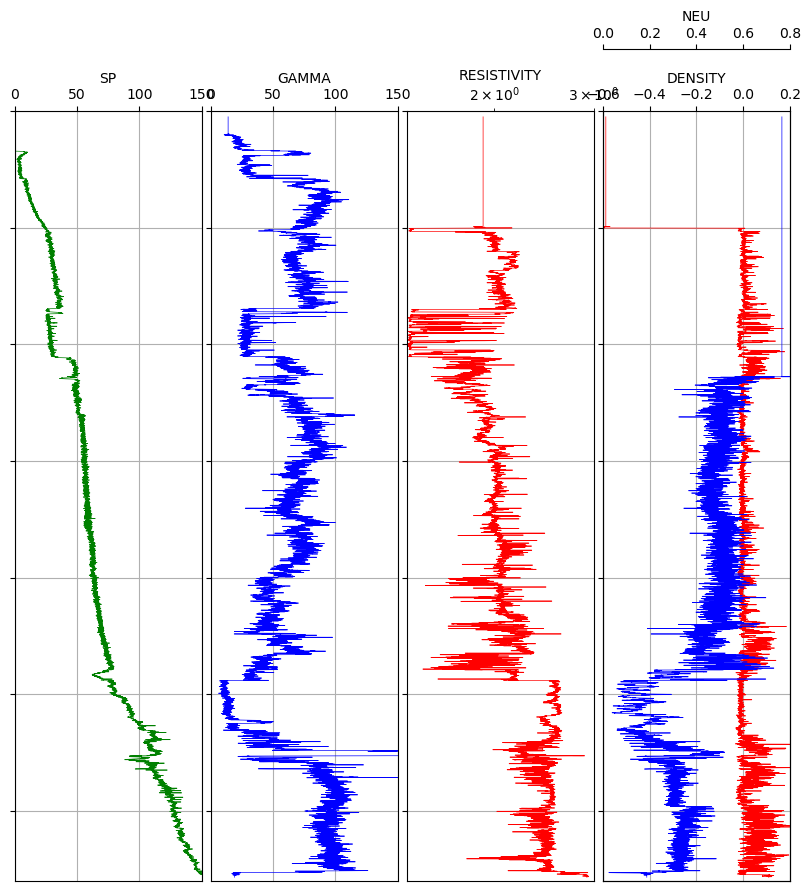

In [49]:
#gamma plot
fig, ax = plt.subplots(figsize=(10,10))

curve_names = ['SP','GAMMA', 'RESISTIVITY', 'DENSITY', 'NEU']

#plot axis
ax1 = plt.subplot2grid((1,4),(0,0),rowspan=1,colspan=1)
ax2 = plt.subplot2grid((1,4),(0,1),rowspan=1,colspan=1)
ax3 = plt.subplot2grid((1,4),(0,2),rowspan=1,colspan=1)
ax4 = plt.subplot2grid((1,4),(0,3),rowspan=1,colspan=1)
ax5 = ax4.twiny()
#fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10,10))
#ax1 = axs[0,0]
#ax2 = axs[0,1]
#ax3 = axs[0,2]
#ax4 = axs[0,2].twiny()
#ax5 = axs[1,0]


ax1.plot('SP','DEPTH', data= data, color ='green',lw=0.5)
ax1.set_xlabel('SP')
ax1.set_xlim(0,150)

ax2.plot('GR','DEPTH', data= data, color ='blue',lw=0.5)
ax2.set_xlabel('GAMMA')
ax2.set_xlim(0,150)
#ax1.set_ylim(2850,2350)
#ax1.grid()


#resistivity plot

ax3.plot('RHOB','DEPTH', data= data, color ='red',lw=0.5)
ax3.set_xlabel('RESISTIVITY')
ax3.set_xlim(1.4,3.0)
ax3.semilogx()
#ax2.set_ylim(2850,2350)
#ax2.grid()


#density plot

ax4.plot('DRHO','DEPTH', data= data, color ='red',lw=0.5)
ax4.set_xlabel('DENSITY')
ax4.set_xlim(-0.6,0.20)
#ax3.set_ylim(2850,2350)
#ax3.grid()

ax5.plot('NPHI','DEPTH', data= data, color ='blue',lw=0.5)
#ax4.set_xlabel('NEU')
ax5.set_xlim(0.0,0.8)


for i, ax in enumerate(fig.axes):
    ax.set_ylim(3300, 0)
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    ax.set_xlabel(curve_names[i])

    if i == 4:
        ax.spines['top'].set_position(('axes',1.08))
    else:
        ax.grid()

    
for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.set_yticklabels([])
    
#reducing the spacings between the subplots
fig.subplots_adjust(wspace=0.05)

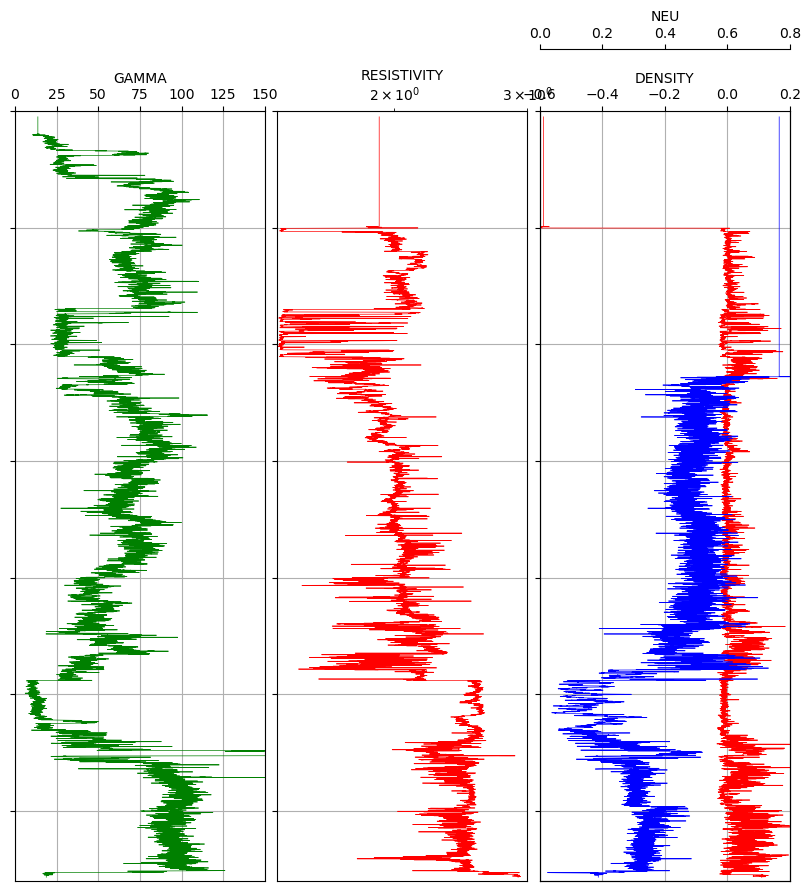

In [50]:
#gamma plot
fig, ax = plt.subplots(figsize=(10,10))

curve_names = ['GAMMA', 'RESISTIVITY', 'DENSITY', 'NEU']

#plot axis
ax1 = plt.subplot2grid((1,3),(0,0),rowspan=1,colspan=1)
ax2 = plt.subplot2grid((1,3),(0,1),rowspan=1,colspan=1)
ax3 = plt.subplot2grid((1,3),(0,2),rowspan=1,colspan=1)
ax4 = ax3.twiny()
#fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10,10))
#ax1 = axs[0,0]
#ax2 = axs[0,1]
#ax3 = axs[0,2]
#ax4 = axs[0,2].twiny()
#ax5 = axs[1,0]



ax1.plot('GR','DEPTH', data= data, color ='green',lw=0.5)
ax1.set_xlabel('GAMMA')
ax1.set_xlim(0,150)
#ax1.set_ylim(2850,2350)
#ax1.grid()


#resistivity plot

ax2.plot('RHOB','DEPTH', data= data, color ='red',lw=0.5)
ax2.set_xlabel('RESISTIVITY')
ax2.set_xlim(1.4,3.0)
ax2.semilogx()
#ax2.set_ylim(2850,2350)
#ax2.grid()


#density plot

ax3.plot('DRHO','DEPTH', data= data, color ='red',lw=0.5)
ax3.set_xlabel('DENSITY')
ax3.set_xlim(-0.6,0.20)
#ax3.set_ylim(2850,2350)
#ax3.grid()

ax4.plot('NPHI','DEPTH', data= data, color ='blue',lw=0.5)
#ax4.set_xlabel('NEU')
ax4.set_xlim(0.0,0.8)


for i, ax in enumerate(fig.axes):
    ax.set_ylim(3300, 0)
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    ax.set_xlabel(curve_names[i])

    if i == 3:
        ax.spines['top'].set_position(('axes',1.08))
    else:
        ax.grid()

    
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_yticklabels([])
    
#reducing the spacings between the subplots
fig.subplots_adjust(wspace=0.05)

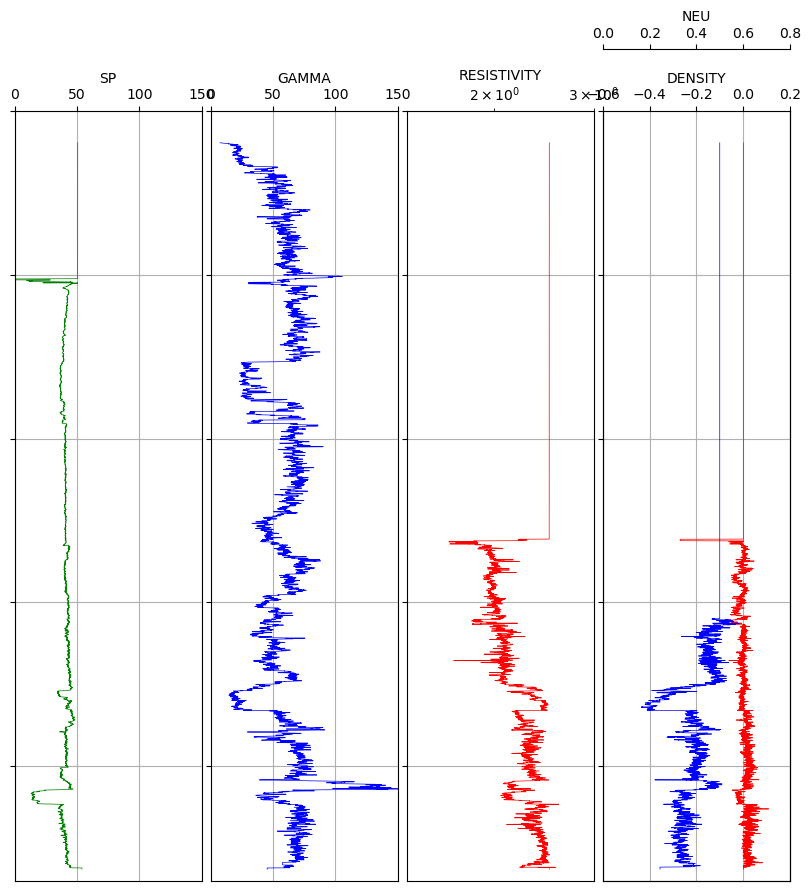

In [51]:
#gamma plot
fig, ax = plt.subplots(figsize=(10,10))

curve_names = ['SP','GAMMA', 'RESISTIVITY', 'DENSITY', 'NEU']

#plot axis
ax1 = plt.subplot2grid((1,4),(0,0),rowspan=1,colspan=1)
ax2 = plt.subplot2grid((1,4),(0,1),rowspan=1,colspan=1)
ax3 = plt.subplot2grid((1,4),(0,2),rowspan=1,colspan=1)
ax4 = plt.subplot2grid((1,4),(0,3),rowspan=1,colspan=1)
ax5 = ax4.twiny()
#fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10,10))
#ax1 = axs[0,0]
#ax2 = axs[0,1]
#ax3 = axs[0,2]
#ax4 = axs[0,2].twiny()
#ax5 = axs[1,0]


ax1.plot('SP','DEPTH', data= data1, color ='green',lw=0.5)
ax1.set_xlabel('SP')
ax1.set_xlim(0,150)

ax2.plot('GR','DEPTH', data= data1, color ='blue',lw=0.5)
ax2.set_xlabel('GAMMA')
ax2.set_xlim(0,150)
#ax1.set_ylim(2850,2350)
#ax1.grid()


#resistivity plot

ax3.plot('RHOB','DEPTH', data= data1, color ='red',lw=0.5)
ax3.set_xlabel('RESISTIVITY')
ax3.set_xlim(1.4,3.0)
ax3.semilogx()
#ax2.set_ylim(2850,2350)
#ax2.grid()


#density plot

ax4.plot('DRHO','DEPTH', data= data1, color ='red',lw=0.5)
ax4.set_xlabel('DENSITY')
ax4.set_xlim(-0.6,0.20)
#ax3.set_ylim(2850,2350)
#ax3.grid()

ax5.plot('NPHI','DEPTH', data= data1, color ='blue',lw=0.5)
#ax4.set_xlabel('NEU')
ax5.set_xlim(0.0,0.8)


for i, ax in enumerate(fig.axes):
    ax.set_ylim(2350, 0)
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    ax.set_xlabel(curve_names[i])

    if i == 4:
        ax.spines['top'].set_position(('axes',1.08))
    else:
        ax.grid()

    
for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.set_yticklabels([])
    
#reducing the spacings between the subplots
fig.subplots_adjust(wspace=0.05)

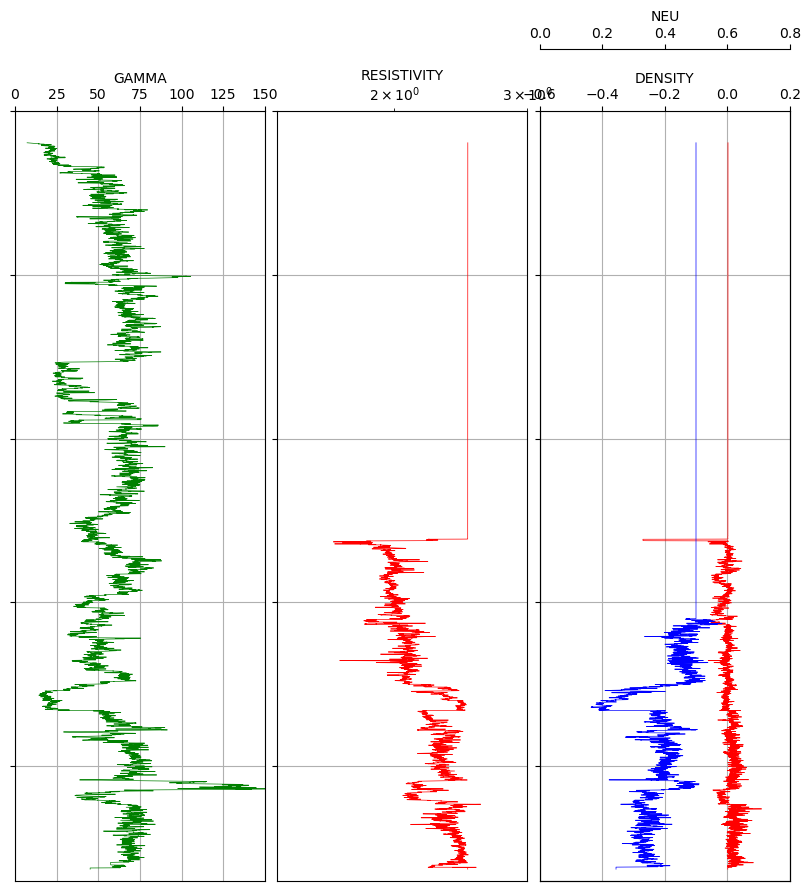

In [52]:
#gamma plot
fig, ax = plt.subplots(figsize=(10,10))

curve_names = ['GAMMA', 'RESISTIVITY', 'DENSITY', 'NEU']

#plot axis
ax1 = plt.subplot2grid((1,3),(0,0),rowspan=1,colspan=1)
ax2 = plt.subplot2grid((1,3),(0,1),rowspan=1,colspan=1)
ax3 = plt.subplot2grid((1,3),(0,2),rowspan=1,colspan=1)
ax4 = ax3.twiny()
#fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10,10))
#ax1 = axs[0,0]
#ax2 = axs[0,1]
#ax3 = axs[0,2]
#ax4 = axs[0,2].twiny()
#ax5 = axs[1,0]



ax1.plot('GR','DEPTH', data= data1, color ='green',lw=0.5)
ax1.set_xlabel('GAMMA')
ax1.set_xlim(0,150)
#ax1.set_ylim(2850,2350)
#ax1.grid()


#resistivity plot

ax2.plot('RHOB','DEPTH', data= data1, color ='red',lw=0.5)
ax2.set_xlabel('RESISTIVITY')
ax2.set_xlim(1.4,3.0)
ax2.semilogx()
#ax2.set_ylim(2850,2350)
#ax2.grid()


#density plot

ax3.plot('DRHO','DEPTH', data= data1, color ='red',lw=0.5)
ax3.set_xlabel('DENSITY')
ax3.set_xlim(-0.6,0.20)
#ax3.set_ylim(2850,2350)
#ax3.grid()

ax4.plot('NPHI','DEPTH', data= data1, color ='blue',lw=0.5)
#ax4.set_xlabel('NEU')
ax4.set_xlim(0.0,0.8)


for i, ax in enumerate(fig.axes):
    ax.set_ylim(2350, 0)
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    ax.set_xlabel(curve_names[i])

    if i == 3:
        ax.spines['top'].set_position(('axes',1.08))
    else:
        ax.grid()

    
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_yticklabels([])
    
#reducing the spacings between the subplots
fig.subplots_adjust(wspace=0.05)


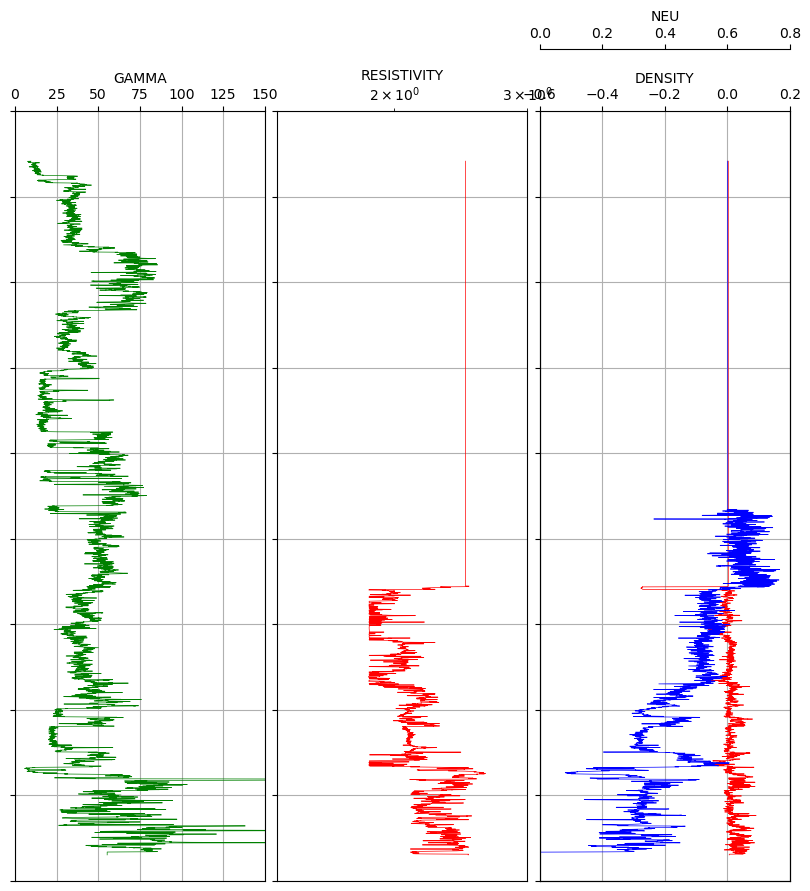

In [53]:
#gamma plot
fig, ax = plt.subplots(figsize=(10,10))

curve_names = ['GAMMA', 'RESISTIVITY', 'DENSITY', 'NEU', 'SP']

#plot axis
ax1 = plt.subplot2grid((1,3),(0,0),rowspan=1,colspan=1)
ax2 = plt.subplot2grid((1,3),(0,1),rowspan=1,colspan=1)
ax3 = plt.subplot2grid((1,3),(0,2),rowspan=1,colspan=1)
ax4 = ax3.twiny()
#fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10,10))
#ax1 = axs[0,0]
#ax2 = axs[0,1]
#ax3 = axs[0,2]
#ax4 = axs[0,2].twiny()
#ax5 = axs[1,0]



ax1.plot('GR','DEPTH', data= data2, color ='green',lw=0.5)
ax1.set_xlabel('GAMMA')
ax1.set_xlim(0,150)
#ax1.set_ylim(2850,2350)
#ax1.grid()


#resistivity plot

ax2.plot('RHOB','DEPTH', data= data2, color ='red',lw=0.5)
ax2.set_xlabel('RESISTIVITY')
ax2.set_xlim(1.4,3.0)
ax2.semilogx()
#ax2.set_ylim(2850,2350)
#ax2.grid()


#density plot

ax3.plot('DRHO','DEPTH', data= data2, color ='red',lw=0.5)
ax3.set_xlabel('DENSITY')
ax3.set_xlim(-0.6,0.20)
#ax3.set_ylim(2850,2350)
#ax3.grid()

ax4.plot('NPHI','DEPTH', data= data2, color ='blue',lw=0.5)
#ax4.set_xlabel('NEU')
ax4.set_xlim(0.0,0.8)


for i, ax in enumerate(fig.axes):
    ax.set_ylim(2250, 0)
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    ax.set_xlabel(curve_names[i])

    if i == 3:
        ax.spines['top'].set_position(('axes',1.08))
    else:
        ax.grid()

    
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_yticklabels([])
    
#reducing the spacings between the subplots
fig.subplots_adjust(wspace=0.05)


##### Combine the 5 datasets together

In [54]:
log_df = pd.concat([data, data1, data2, data3, data4], ignore_index=True)

In [55]:
north_well = log_df.copy()

In [56]:
log_df.isna().sum()

DEPTH            0
LITHOLOGY        0
ROP              0
RDEP             0
RMED             0
SP           18731
DTC              0
NPHI             0
GR               0
RHOB             0
DRHO         15388
RSHA         68095
PEF          64752
dtype: int64

###### Cleaning and Preprocessing: Clean the combined dataset

In [57]:
#normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(north_well)
scaler = StandardScaler()
normalized_data = scaler.fit_transform(north_well)

# apply a Butterworth filter to remove high-frequency noise
fs = 1000  # sample rate
nyquist = fs/2
cutoff_freq = 50  # cutoff frequency
b, a = signal.butter(2, cutoff_freq/nyquist, 'lowpass')
filtered_data = signal.filtfilt(b, a, north_well)

#interpolate
north_well = north_well.interpolate(method='linear', limit_direction='both')



def remove_outliers(north_well):
    # Calculate skewness
    data_skewness = skew(north_well)

    # Calculate z-scores
    z_scores = (north_well - np.mean(north_well)) / np.std(north_well)

    # Define threshold for outliers
    threshold = 3

    # Remove outliers
    north_well = north_well[abs(z_scores) <= threshold]

    return north_well

In [58]:
north_well.isna().sum()

DEPTH        0
LITHOLOGY    0
ROP          0
RDEP         0
RMED         0
SP           0
DTC          0
NPHI         0
GR           0
RHOB         0
DRHO         0
RSHA         0
PEF          0
dtype: int64

#####  Convert the target column(Lithology)  to integer

In [59]:
north_well['LITHOLOGY'] = north_well['LITHOLOGY'].astype(int)

In [60]:
north_well['LITHOLOGY'].value_counts()

65000    55315
70000    12838
30000     8494
65030     3034
80000     1921
99000     1085
70032      546
74000      136
90000       77
86000       17
37000        1
47515        1
65015        1
62840        1
60651        1
58461        1
56272        1
54083        1
51893        1
49704        1
45325        1
43136        1
40946        1
38757        1
58000        1
34378        1
32189        1
51000        1
44000        1
36568        1
Name: LITHOLOGY, dtype: int64

##### Map the Target 0-10

In [61]:
mapping = {
    86000: 9, 90000: 8, 74000: 7, 70032: 6, 99000: 5,
    80000: 4, 65030: 3, 30000: 2, 70000: 1, 65000: 0,
    37000: 10, 47515: 10, 65015: 10, 62840: 10, 60651: 10,
    58461: 10, 56272: 10, 54083: 10, 51893: 10, 49704: 10,
    45325: 10, 43136: 10, 40946: 10, 38757: 10, 58000: 10,
    34378: 10, 32189: 10, 51000: 10, 44000: 10, 36568: 10
}

north_well['LITHOLOGY'] = north_well['LITHOLOGY'].map(mapping).fillna(north_well['LITHOLOGY'])

Class Distribution:
0     66.258999
1     15.377981
2     10.174527
3      3.634273
4      2.301067
5      1.299666
6      0.654025
7      0.162907
8      0.092234
10     0.023957
9      0.020363
Name: LITHOLOGY, dtype: float64


<AxesSubplot:title={'center':'Class Distribution'}>

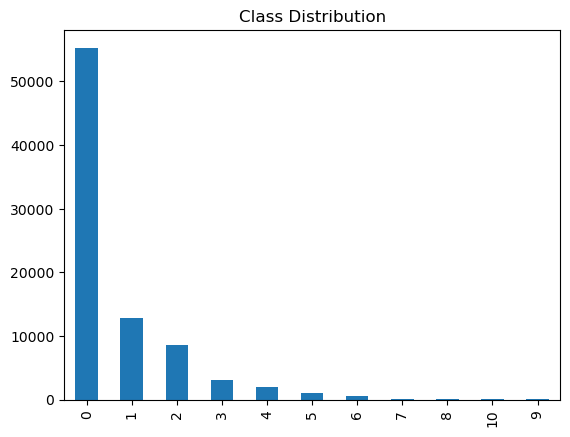

In [104]:
# Count the number of samples in each class
class_counts = north_well['LITHOLOGY'].value_counts()

# Calculate the class distribution
class_distribution = class_counts / len(north_well) * 100

# Print the class distribution
print("Class Distribution:")
print(class_distribution)

# Plot the class distribution
class_counts.plot(kind='bar', title='Class Distribution')


In [63]:
#inbalanced class

##### Select the features (X) and target (y),Split the data into train and test sets

In [64]:
features = ['DEPTH','NPHI','GR', 'RHOB', 'DRHO']
target = 'LITHOLOGY'

In [65]:
X = north_well[features]
y = north_well[target]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,DEPTH,NPHI,GR,RHOB,DRHO
82187,3022.128400,0.214693,80.718834,2.527442,0.063808
54132,862.835729,0.700897,7.584300,2.131007,0.040256
11833,1823.616000,0.489006,72.201500,2.039310,0.003912
55825,1120.171729,0.700897,43.428780,2.131007,0.052417
63625,2305.771729,0.226063,56.687580,2.240695,0.108445
...,...,...,...,...,...
6265,977.280000,0.765867,26.679962,1.416807,-0.014793
54886,977.443729,0.700897,47.403046,2.131007,0.045672
76820,2206.344400,0.273880,62.385319,2.180555,0.033427
860,155.720000,0.765867,22.069513,1.909681,-0.588390


In [67]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# Instantiate the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training set only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
class_counts = y_train_resampled.value_counts()
class_distribution = class_counts / len(y_train_resampled) * 100

# Print the class distribution
print("Class Distribution after SMOTE:")
print(class_distribution)


Class Distribution after SMOTE:
0     9.090909
2     9.090909
1     9.090909
6     9.090909
5     9.090909
3     9.090909
4     9.090909
8     9.090909
7     9.090909
10    9.090909
9     9.090909
Name: LITHOLOGY, dtype: float64


<AxesSubplot:title={'center':'Class Distribution'}>

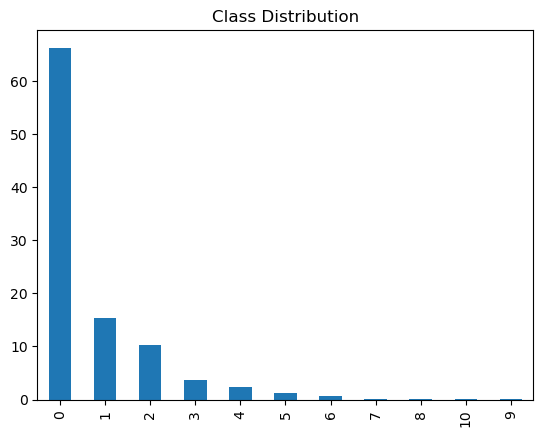

In [105]:
# Plot the class distribution
class_distribution.plot(kind='bar', title='Class Distribution')

In [68]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))


print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (66786, 5)
y_train shape: (66786,)
X_test shape: (16697, 5)
y_test shape: (16697,)


###### Time to Model

#### Decision Tree and Random forest

In [69]:
# Create the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

In [70]:
# Train the Decision Tree model

dt_classifier.fit(X_train, y_train)
DecisionTreeClassifier()

DecisionTreeClassifier()

In [71]:
 #Perform cross-validation
scores = cross_val_score(dt_classifier, X, y, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:")
print(scores)

Cross-Validation Scores:
[0.67892436 0.71641612 0.766485   0.49011739 0.52048395]


In [72]:
cv_scores = [0.69473558, 0.71018746, 0.76918009, 0.49826306, 0.43345712]

In [73]:
mean = np.mean(cv_scores)

# Print the standard deviation
print("mean:", mean)

mean: 0.621164662


In [74]:
# Calculate the standard deviation
std_dev = np.std(cv_scores)

# Print the standard deviation
print("Standard Deviation:", std_dev)

Standard Deviation: 0.13083212951181594


In [75]:
# Make predictions on the testing dataset
predictions = dt_classifier.predict(X_test)

print(predictions)

[0 0 0 ... 0 2 0]


In [76]:
accuracy = accuracy_score(y_test, predictions)

In [77]:
print(accuracy)

0.96316703599449


In [78]:
# Calculate confusion matrix
confusion = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[10847    22    71    96    18    12     0     1     3     0]
 [   23  2499     6     2     4     3     0     0     0     0]
 [   73    11  1570    31     3     8     5     0     1     0]
 [  112     1    22   467     2     2     0     0     2     0]
 [   20     7     1     5   363     0     0     0     0     0]
 [   28     4     5     0     0   189     0     0     0     0]
 [    0     0     2     0     3     0   103     0     0     0]
 [    0     0     0     0     0     0     0    32     0     0]
 [    2     0     0     3     0     0     0     0    11     0]
 [    1     0     0     0     0     0     0     0     0     1]]


In [79]:
# Calculate precision score
precision = precision_score(y_test, predictions, average='macro', zero_division=1)

In [80]:
# Calculate recall score
recall = recall_score(y_test, predictions, average='macro', zero_division=1)

In [81]:
# Calculate F1 score
f1 = f1_score(y_test, predictions, average='macro')

In [82]:
# Get probability estimates for each class
probs = dt_classifier.predict_proba(X_test)

In [83]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 0], pos_label=65000)

In [84]:
# Print the results
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
#print("ROC AUC Score:", roc_auc)
print("FPR:", fpr)
#print("TPR:", tpr)
print("Thresholds:", thresholds)

Precision Score: 0.9045666177686396
Recall Score: 0.8549566989157904
F1 Score: 0.8712720922916747
FPR: [0.         0.66514943 1.        ]
Thresholds: [2. 1. 0.]


In [85]:
# Initialize a random forest classifier model
rf_model = RandomForestClassifier()

In [86]:
# Train the model on the train set
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [87]:
 #Perform cross-validation
scores = cross_val_score(rf_model, X, y, cv=10)  # 5-fold cross-validation

In [88]:
# Print the cross-validation scores
print("Cross-Validation Scores:")
print(scores)

Cross-Validation Scores:
[0.9177147  0.77566176 0.51275602 0.88176809 0.68567322 0.91518927
 0.57977959 0.5741495  0.43483469 0.77503594]


In [89]:
cv_scores = [0.91747515, 0.77278716, 0.5076057,  0.87985146, 0.6836368,  0.91351222, 0.58277432, 0.56756109, 0.40884044, 0.76892669]

In [90]:
mean = np.mean(cv_scores)
# Print the mean
print("mean:", mean)

mean: 0.7002971029999999


In [91]:
# Calculate the standard deviation
std_dev = np.std(cv_scores)

# Print the standard deviation
print("Standard Deviation:", std_dev)

Standard Deviation: 0.1698871885910919


In [92]:
rf_pred = rf_model.predict(X_test)

In [93]:
# Make predictions on the testing dataset


print(rf_pred)

[0 0 0 ... 0 2 0]


In [94]:
accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9751452356710787


In [95]:
# Calculate metrics for Random Forest
rf_precision = precision_score(y_test, rf_pred, average='macro')
rf_recall = recall_score(y_test, rf_pred, average='macro')
rf_f1 = f1_score(y_test, rf_pred, average='macro')

In [96]:
# Get probability estimates for each class
probs = rf_model.predict_proba(X_test)

In [97]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 0], pos_label=65000)

In [98]:
# Calculate confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(rf_cm)

Confusion Matrix:
[[10957     5    44    41    17     6     0     0     0     0]
 [   23  2505     4     2     2     1     0     0     0     0]
 [   60     3  1624    12     1     2     0     0     0     0]
 [   91     0    29   485     0     1     0     0     2     0]
 [   14     5     0     2   375     0     0     0     0     0]
 [   22     0    13     0     0   191     0     0     0     0]
 [    0     3     0     0     3     0   102     0     0     0]
 [    2     0     0     0     0     0     0    30     0     0]
 [    3     0     0     1     0     0     0     0    12     0]
 [    1     0     0     0     0     0     0     0     0     1]]


In [99]:
print("Random Forest Metrics:")
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
#print("AUC-ROC:", rf_auc_roc)
print("FPR:", fpr)
#print("TPR:", tpr)
print("Thresholds:", thresholds)
print()

Random Forest Metrics:
Precision: 0.9564600914057253
Recall: 0.8653094724498656
F1 Score: 0.9014319163249842
FPR: [0.         0.46846739 0.52320776 0.54979937 0.56710786 0.58010421
 0.58860873 0.59651434 0.60226388 0.60723483 0.612086   0.61567946
 0.61825478 0.62136911 0.62382464 0.62645984 0.6280769  0.63089178
 0.63220938 0.63376654 0.63562317 0.63861772 0.64065401 0.64245074
 0.64322932 0.64478649 0.64658322 0.64778104 0.64891897 0.65029646
 0.65107504 0.65191352 0.65263221 0.65353057 0.65454872 0.65544709
 0.65622567 0.65676469 0.65760316 0.65838175 0.65886087 0.65916033
 0.66017848 0.66077739 0.66149608 0.66209499 0.66251422 0.66347248
 0.66431095 0.6653291  0.66580823 0.6666467  0.66790441 0.66844343
 0.66928191 0.66994071 0.6706594  0.67161766 0.67221657 0.67287537
 0.6740133  0.67455231 0.67515122 0.67610948 0.67754686 0.67802599
 0.67916392 0.68006229 0.68137989 0.68293705 0.68407498 0.68539259
 0.68629095 0.68694975 0.68826735 0.68970474 0.69084267 0.69180092
 0.69443613 0.6

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Instantiate the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the resampled training data
dt_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
dt_predictions = dt_classifier.predict(X_test)

# Calculate the accuracy of the Decision Tree Classifier
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Classifier Accuracy:", dt_accuracy)

# Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier on the resampled training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
rf_predictions = rf_classifier.predict(X_test)

# Calculate the accuracy of the Random Forest Classifier
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Classifier Accuracy:", rf_accuracy)


Decision Tree Classifier Accuracy: 0.9657423489249566
Random Forest Classifier Accuracy: 0.9746661076840151


In [101]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix

# Decision Tree Classifier
# Calculate predictions
dt_predictions = dt_classifier.predict(X_test)

# Calculate precision, F1-score, and recall using 'weighted' averaging
dt_precision = precision_score(y_test, dt_predictions, average='weighted')
dt_f1_score = f1_score(y_test, dt_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_predictions, average='weighted')

# Calculate confusion matrix
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)

print("Decision Tree Classifier Metrics:")
print("Precision:", dt_precision)
print("F1-Score:", dt_f1_score)
print("Recall:", dt_recall)
print("Confusion Matrix:")
print(dt_confusion_matrix)

# Random Forest Classifier
# Calculate predictions
rf_predictions = rf_classifier.predict(X_test)

# Calculate precision, F1-score, and recall using 'weighted' averaging
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_f1_score = f1_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')

# Calculate confusion matrix
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

print("Random Forest Classifier Metrics:")
print("Precision:", rf_precision)
print("F1-Score:", rf_f1_score)
print("Recall:", rf_recall)
print("Confusion Matrix:")
print(rf_confusion_matrix)

Decision Tree Classifier Metrics:
Precision: 0.9675875862654948
F1-Score: 0.9664508205125779
Recall: 0.9657423489249566
Confusion Matrix:
[[10739    34    87   141    40    16     0     2     0    11]
 [   18  2509     3     3     3     1     0     0     0     0]
 [   45     3  1635    15     2     1     1     0     0     0]
 [   60     0    24   522     0     1     0     0     1     0]
 [   17     5     0     0   373     0     1     0     0     0]
 [   14     2     8     0     0   202     0     0     0     0]
 [    1     0     0     0     6     0   101     0     0     0]
 [    2     0     0     0     0     0     0    30     0     0]
 [    2     0     0     1     0     0     0     0    13     0]
 [    1     0     0     0     0     0     0     0     0     1]]
Random Forest Classifier Metrics:
Precision: 0.9759862628168665
F1-Score: 0.9751011374500808
Recall: 0.9746661076840151
Confusion Matrix:
[[10802     9    76   113    47    16     0     3     1     3]
 [   16  2514     2     1     

In [102]:
from sklearn.metrics import roc_curve

# Decision Tree Classifier
# Calculate probabilities for each class
dt_probabilities = dt_classifier.predict_proba(X_test)

# Get the unique classes in the target variable
classes = np.unique(y_test)

# Initialize empty lists for TPR and FPR
dt_tprs = []
dt_fprs = []

# Iterate over each class
for class_label in classes:
    # Create binary target for the current class
    y_binary = np.where(y_test == class_label, 1, 0)

    # Calculate TPR and FPR for the current class
    fpr, tpr, _ = roc_curve(y_binary, dt_probabilities[:, class_label])

    # Append TPR and FPR to the lists
    dt_tprs.append(tpr[1])
    dt_fprs.append(fpr[1])

# Print TPR and FPR for each class
for i, class_label in enumerate(classes):
    print(f"Decision Tree - Class {class_label}: TPR = {dt_tprs[i]}, FPR = {dt_fprs[i]}")

# Random Forest Classifier
# Calculate probabilities for each class
rf_probabilities = rf_classifier.predict_proba(X_test)

# Initialize empty lists for TPR and FPR
rf_tprs = []
rf_fprs = []

# Iterate over each class
for class_label in classes:
    # Create binary target for the current class
    y_binary = np.where(y_test == class_label, 1, 0)

    # Calculate TPR and FPR for the current class
    fpr, tpr, _ = roc_curve(y_binary, rf_probabilities[:, class_label])

    # Append TPR and FPR to the lists
    rf_tprs.append(tpr[1])
    rf_fprs.append(fpr[1])

# Print TPR and FPR for each class
for i, class_label in enumerate(classes):
    print(f"Random Forest - Class {class_label}: TPR = {rf_tprs[i]}, FPR = {rf_fprs[i]}")


Decision Tree - Class 0: TPR = 0.9700993676603432, FPR = 0.02843433445885907
Decision Tree - Class 1: TPR = 0.9889633425305479, FPR = 0.0031073446327683617
Decision Tree - Class 2: TPR = 0.9606345475910694, FPR = 0.008136045348449483
Decision Tree - Class 3: TPR = 0.8585526315789473, FPR = 0.009944682702467525
Decision Tree - Class 4: TPR = 0.9419191919191919, FPR = 0.003128642414575793
Decision Tree - Class 5: TPR = 0.8938053097345132, FPR = 0.0011535425900066783
Decision Tree - Class 6: TPR = 0.9351851851851852, FPR = 0.00012056181807221654
Decision Tree - Class 7: TPR = 0.9375, FPR = 0.00012001200120012002
Decision Tree - Class 8: TPR = 0.8125, FPR = 5.994844433786943e-05
Decision Tree - Class 10: TPR = 0.5, FPR = 0.000658879904162923
Random Forest - Class 0: TPR = 0.6691056910569105, FPR = 0.00035542918073573843
Random Forest - Class 1: TPR = 0.953882538431218, FPR = 0.0
Random Forest - Class 2: TPR = 0.5611045828437132, FPR = 0.0
Random Forest - Class 3: TPR = 0.25493421052631576,

In [103]:
from sklearn.metrics import roc_curve

# Decision Tree Classifier
# Calculate probabilities for each class
dt_probabilities = dt_classifier.predict_proba(X_test)

# Get the unique classes in the target variable
classes = np.unique(y_test)

# Initialize empty lists for TPR and FPR
dt_tprs = []
dt_fprs = []

# Iterate over each class
for class_label in classes:
    # Create binary target for the current class
    y_binary = np.where(y_test == class_label, 1, 0)
    
    # Calculate TPR and FPR for the current class
    fpr, tpr, _ = roc_curve(y_binary, dt_probabilities[:, class_label])
    
    # Append TPR and FPR to the lists
    dt_tprs.append(tpr[1])
    dt_fprs.append(fpr[1])

# Print TPR and FPR for each class
for i, class_label in enumerate(classes):
    print(f"Class {class_label} - TPR: {dt_tprs[i]}, FPR: {dt_fprs[i]}")


Class 0 - TPR: 0.9700993676603432, FPR: 0.02843433445885907
Class 1 - TPR: 0.9889633425305479, FPR: 0.0031073446327683617
Class 2 - TPR: 0.9606345475910694, FPR: 0.008136045348449483
Class 3 - TPR: 0.8585526315789473, FPR: 0.009944682702467525
Class 4 - TPR: 0.9419191919191919, FPR: 0.003128642414575793
Class 5 - TPR: 0.8938053097345132, FPR: 0.0011535425900066783
Class 6 - TPR: 0.9351851851851852, FPR: 0.00012056181807221654
Class 7 - TPR: 0.9375, FPR: 0.00012001200120012002
Class 8 - TPR: 0.8125, FPR: 5.994844433786943e-05
Class 10 - TPR: 0.5, FPR: 0.000658879904162923


Class 0: TPR of approximately 0.97 indicates that around 97% of actual Class 0 instances were correctly classified as Class 0. FPR of approximately 0.03 indicates that around 3% of instances from other classes were misclassified as Class 0.
Class 1: TPR of approximately 0.99 indicates that around 99% of actual Class 1 instances were correctly classified as Class 1. FPR of approximately 0.003 indicates a low false positive rate.
Class 2: TPR of approximately 0.96 indicates that around 96% of actual Class 2 instances were correctly classified as Class 2. FPR of approximately 0.008 indicates a low false positive rate.
Class 3: TPR of approximately 0.86 indicates that around 86% of actual Class 3 instances were correctly classified as Class 3. FPR of approximately 0.01 indicates a low false positive rate.
Class 4: TPR of approximately 0.94 indicates that around 94% of actual Class 4 instances were correctly classified as Class 4. FPR of approximately 0.003 indicates a low false positive rate.
Class 5: TPR of approximately 0.89 indicates that around 89% of actual Class 5 instances were correctly classified as Class 5. FPR of approximately 0.001 indicates a low false positive rate.
Class 6: TPR of approximately 0.94 indicates that around 94% of actual Class 6 instances were correctly classified as Class 6. FPR of approximately 0.00012 indicates a very low false positive rate.
Class 7: TPR of approximately 0.94 indicates that around 94% of actual Class 7 instances were correctly classified as Class 7. FPR of approximately 0.00012 indicates a very low false positive rate.
Class 8: TPR of approximately 0.81 indicates that around 81% of actual Class 8 instances were correctly classified as Class 8. FPR of approximately 6e-05 indicates a very low false positive rate.
Class 10: TPR of 0.5 indicates that 50% of actual Class 10 instances were correctly classified as Class 10. FPR of approximately 0.00066 indicates a very low false positive rate.
For the Random Forest Classifier:

Class 0: TPR of approximately 0.67 indicates that around 67% of actual Class 0 instances were correctly classified as Class 0. FPR of approximately 0.00036 indicates a very low false positive rate.
Class 1: TPR of approximately 0.95 indicates that around 95% of actual Class 1 instances were correctly classified as Class 1. FPR of 0 indicates that there were no false positive classifications for Class 1.
Class 2: TPR of approximately 0.56 indicates that around 56% of actual Class 2 instances were correctly classified as Class 2. FPR of 0 indicates that there were no false positive classifications for Class 2.
Class 3: TPR of approximately 0.25 indicates that around 25% of actual Class 3 instances were correctly classified as Class 3. FPR of approximately 0.00025 indicates a very low false positive rate.
Class 4: TPR of approximately 0.53 indicates that around 53% of actual Class 4 instances were correctly classified as Class 4. FPR of approximately 6e-05 indicates a very low false positive rate.
Class 5: TPR of approximately 0.45 indicates that around 45% of actual Class 5 instances were correctly classified as Class 5. FPR of 0 indicates that there were no false positive classifications for Class 5.
Class 6: TPR of approximately 0.67 indicates that around 67% of actual Class 6 instances were correctly classified as Class 6. FPR of 0 indicates that there were no false positive classifications for Class 6.
Class 7: TPR of approximately 0.84 indicates that around 84% of actual Class 7 instances were correctly classified as Class 7. FPR of 0 indicates that there were no false positive classifications for Class 7.
Class 8: TPR of 0.5 indicates that 50% of actual Class 8 instances were correctly classified as Class 8. FPR of 0 indicates that there were no false positive classifications for Class 8.
Class 10: TPR of 0.5 indicates that 50% of actual Class 10 instances were correctly classified as Class 10. FPR of 0 indicates that there were no false positive classifications for Class 10.